In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv(r'C:\Users\REGGIE\Desktop\student\数据分析资料\机器学习\02.2019年Scikit-learn的机器学习\00.配套资料\01 决策树课件数据源码\Taitanic data\data.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列 
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

In [6]:
#处理缺失值，对缺失值较多的列进行填补，有一些特征只缺失了一两个值，可以采取直接删除记录的方法 
data["Age"] = data["Age"].fillna(data["Age"].mean()) 
#只要有缺失值的行都进行删除
data = data.dropna()

In [8]:
#将分类变量转化为数值类变量
#将2分类变量转化为数值类变量
#astype能够将一个pandas对象转化为某种类型，和apply（int）不同，astype可以将文本类转化为数字，用这个方式可以便捷的将2分类的特征转化为0-1
data.Sex = (data.Sex == 'male').astype('int')

In [9]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [11]:
#将三分类变量转化为数值类变量
labels = data.Embarked.unique().tolist()
#把S,C,Q转换成数字
data.Embarked = data.Embarked.apply(lambda x : labels.index(x))

In [14]:
#提取标签和特征矩阵，分测试集和训练集
from sklearn.model_selection import train_test_split
X = data.iloc[:,data.columns!= 'Survived']
y = data.iloc[:,data.columns== 'Survived']

In [17]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3)

In [19]:
#修正训练集和测试集的索引
for i in [Xtrain,Xtest,ytrain,ytest]:
    i.index = range(i.shape[0])

In [21]:
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,198,3,1,42.000000,0,1,8.4042,0
1,339,3,1,45.000000,0,0,8.0500,0
2,484,3,0,63.000000,0,0,9.5875,0
3,468,1,1,56.000000,0,0,26.5500,0
4,102,3,1,29.699118,0,0,7.8958,0


In [24]:
#导入模型，粗略跑一下并查看结果。
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
clf.fit(Xtrain,ytrain)
score_ = clf.score(Xtest,ytest)

score_

score = cross_val_score(clf,X,y,cv=10).mean()

score

0.7447395301327886

0.8166624106230849


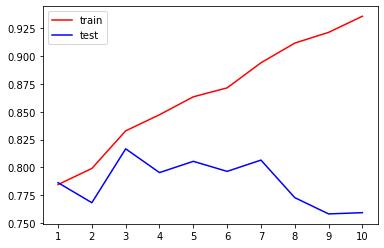

In [29]:
tr = []
te =[]
for i in range(10):
    clf = DecisionTreeClassifier(
                                random_state=25
                                ,max_depth=i+1
                                ,criterion='entropy'
                                
    )
    clf.fit(Xtrain,ytrain)
    score_tr = clf.score(Xtrain,ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
    
print(max(te))

plt.plot(range(1,11),tr,color = 'red',label = 'train')
plt.plot(range(1,11),te,color = 'blue',label = 'test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [27]:
#用网格搜索调整最佳参数
import numpy as np

gini_thresholds = np.linspace(0,0.5,20)

params = {'splitter':('best','random')
         ,'criterion':('gini','entropy')
         ,'max_depth':[*range(1,10)]
         ,'min_samples_leaf':[*range(1,50,5)]
         ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
         }

clf = DecisionTreeClassifier()
gv = GridSearchCV(clf,params,cv = 10)
gv.fit(Xtrain,ytrain)


gv.best_params_
gv.best_score_

0.8279825908858166

In [28]:
gv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}